# Mini Lab: Logistic Regression and SVMs
### Group A: Mai Loan Tran, Lei Jiang, Zachary Gill, & Samantha Sprague

# EDA Notebook

This notebook goes through all of the analysis that was done in order to provide sufficient EDA for the Mini Lab. We needed to change datasets due to extrodinarily poor predictive power of the dataset we chose from lab 1. The predictive power was less than 50% (or random). 

In [105]:
#diabetes df
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns


In [106]:
directory = '/Users/samanthasprague/Downloads'
df = pd.read_csv(directory + 'Diabetic_Cleaned.csv')
df_clean = df
df_clean.replace('?', np.nan, inplace=True)

In [107]:
df_clean.shape

(101766, 51)

In [41]:
df_clean.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,readmitted,diag_1_val,diag_2_val,diag_3_val,readmitted_tf,medication_count,admission_source,discharge_disposition,admission_type,meds_increased
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,NO,Diabeties,None,None,0,0,Physician Referral,Not Mapped,NaN,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,Unspecified,...,>30,Neoplasms,Diabeties,Neoplasms,1,1,Emergency Room,Discharged to home,Emergency,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,Unspecified,...,NO,Other,Diabeties,Other,0,1,Emergency Room,Discharged to home,Emergency,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,Unspecified,...,NO,Neoplasms,Diabeties,Circulatory,0,1,Emergency Room,Discharged to home,Emergency,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,Unspecified,...,NO,Neoplasms,Neoplasms,Diabeties,0,2,Emergency Room,Discharged to home,Emergency,0


## Data Meaning Type

Data fields

    'encounter_id' unique identifier of an encounter
    'patient_nbr' unique identifier of a patient
    'race' patient race
    'gender' patient gender   # gender need to be in 0 and 1 and describe 0 for male, 1 for female in this section
    'age' patient aged (binned in intervals of 10 years)
    'weight' weight in pounds
    'admission_type_id' type of admission in the hospital
    'discharge_disposition_id' reason for discharge
    'admission_source_id' source of admission
    'time_in_hospital' number of days between admission and discharge
    'payer_code' identifier for type of insurance/payment
    'medical_specialty' specialty of the admitting physician
    'num_lab_procedures' number of lab tested performed during encounter
    'num_procedures' numbver of procedures (other than lab tests) during encounter
    'num_medications' number of distinct medications administered during the encounter
    'number_outpatient' number of outpatient visits on the year preceding the encounter
    'number_emergency' number of emergency visits in the year preceding the encouunter
    'number_inpatient' number of inpatient visits in the year preceding the encounter
    'diag_1' primary diagnosis
    'diag_2' secondary diagnosis
    'diag_3' additional secondary diagnosis
    'number_diagnoses' number of diagnoses entered in the system
    'max_glu_serum' glucose serum test result
    'A1Cresult'  A1c test result
    The following 24 features indicate changes in dosage of 24 distinct medications:
        'metformin'
        'repaglinide'
        'nateglinide'
        'chlorpropamide'
        'glimepiride'
        'acetohexamide'
        'glipizide'
        'glyburide'
        'tolbutamide'
        'pioglitazone'
        'rosiglitazone'
        'acarbose'
        'miglitol'
        'troglitazone'
        'tolazamide'
        'examide'
        'citoglipton'
        'insulin'
        'glyburide-metformin'
        'glipizide-metformin'
        'glimepiride-pioglitazone'
        'metformin-rosiglitazone'
        'metformin-pioglitazone'
    'medication_count' new feature created in the data cleaning stage, it means the counts of the above 24 medications per     patient per encounter.
    'change'  if there was change in the patient's diabetes medication
    'diabetesMed' if diabetes medication was prescribed
    'readmitted' the target variable: either "NO", "<30" or ">30"


In [7]:
#Data Type
#majority categorical

df_clean.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

In [8]:
#Simple Statistics
df_clean.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_tf,medication_count,meds_increased
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.675904,4.388362,4.372443,4.589696,34.047383,1.456577,16.560492,0.369357,0.212232,0.635566,7.422607,0.460881,1.178616,0.120089
std,1.026403e+08,3.869636e+07,1.530799,6.013795,4.687549,3.160314,22.386944,1.792201,9.105980,1.267265,0.917842,1.262863,1.933600,0.498470,0.924977,0.325067
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,16.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000
50%,1.523890e+08,4.550514e+07,3.000000,1.000000,2.000000,4.000000,30.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000
75%,2.302709e+08,8.754595e+07,4.000000,6.000000,7.000000,6.000000,49.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,2.000000,0.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,129.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000,6.000000,1.000000


In [9]:
missing = pd.DataFrame({'column':df.columns ,'na_percent':df.isnull().sum()/len(df)*100, 'na_count':df.isnull().sum()})
missing[missing.na_percent > 0]

,column,na_percent,na_count
admission_source,admission_source,5.879174,5983
discharge_disposition,discharge_disposition,3.616139,3680
admission_type,admission_type,4.011163,4082


In [10]:
pandas_profiling.ProfileReport(df_clean)

Number of variables,51
Number of observations,101766
Total Missing (%),0.3%
Total size in memory,39.6 MiB
Average record size in memory,408.0 B
Numeric,14
Categorical,35
Boolean,2
Date,0
Text (Unique),0
Rejected,0


#### imbalanced data distribution
From pandas_profiling, we can see there are a number of highly imbalanced variables: acarbose, acetohexamide
#### Corr plot 
check correlations for LR assumptions
num_lab_procedures is highly correlated with admission_type_id

In [11]:
# Data Distribution
df_clean["readmitted_tf"].value_counts()

0    54864
1    46902
Name: readmitted_tf, dtype: int64

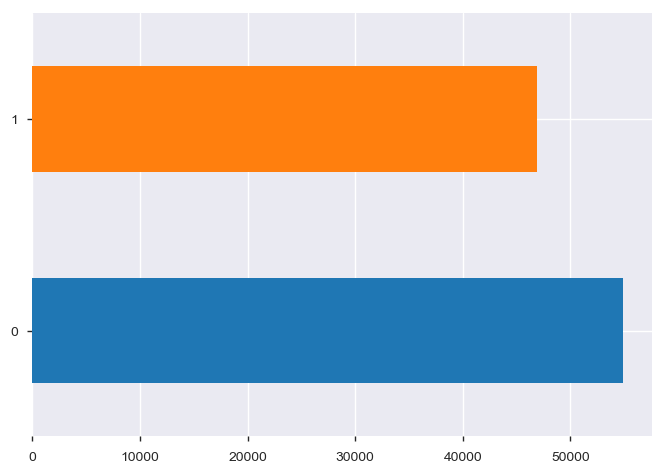

In [12]:
#Visualize Attributes
#distribution of target
df_clean_readmitted_tf = df_clean["readmitted_tf"].value_counts()
df_clean_readmitted_tf.plot(kind = 'barh')
plt.show()

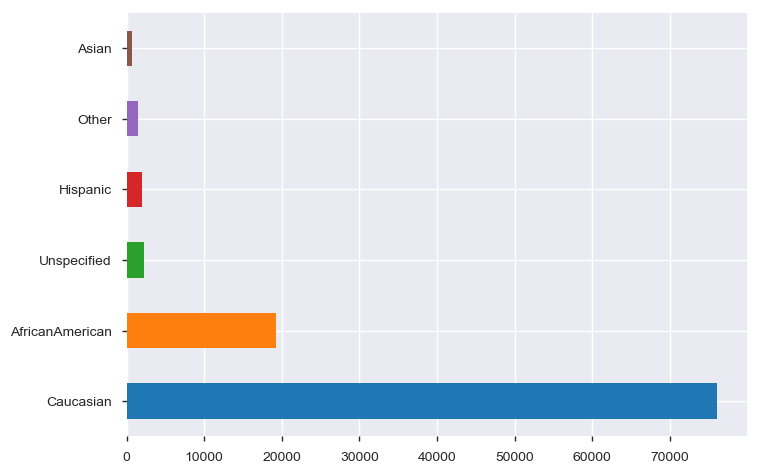

In [13]:
##distribution of insulin
df_clean_readmitted_tf = df_clean["race"].value_counts()
df_clean_readmitted_tf.plot(kind = 'barh')
plt.show()

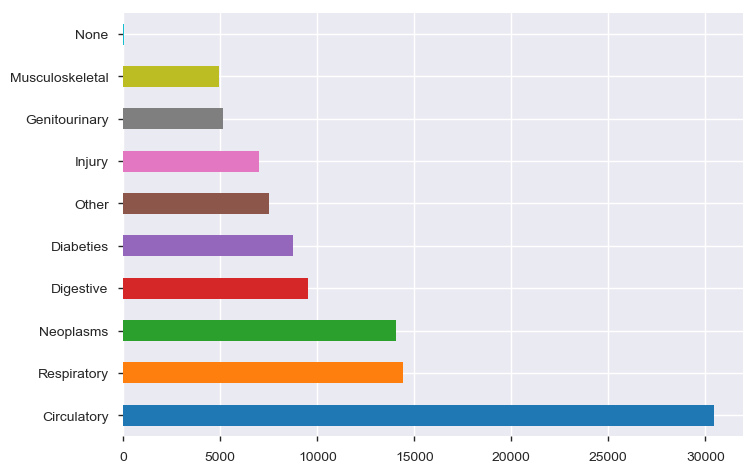

In [14]:
##distribution of diag_1_val
df_clean_readmitted_tf = df_clean["diag_1_val"].value_counts()
df_clean_readmitted_tf.plot(kind = 'barh')
plt.show()

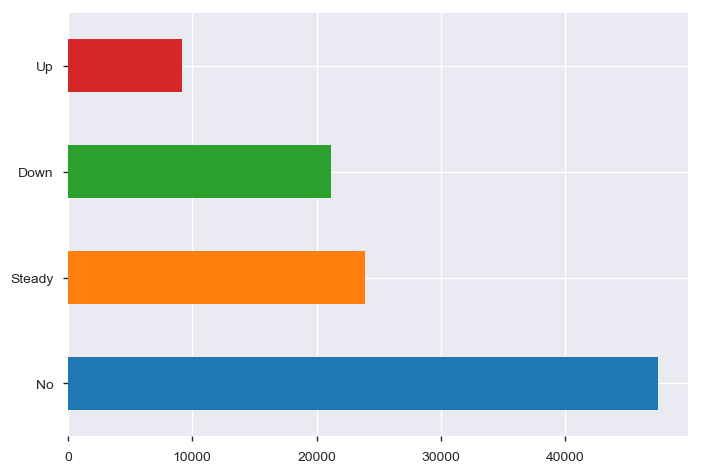

In [16]:
##distribution of insulin
df_clean_readmitted_tf = df_clean["insulin"].value_counts()
df_clean_readmitted_tf.plot(kind = 'barh')
plt.show()

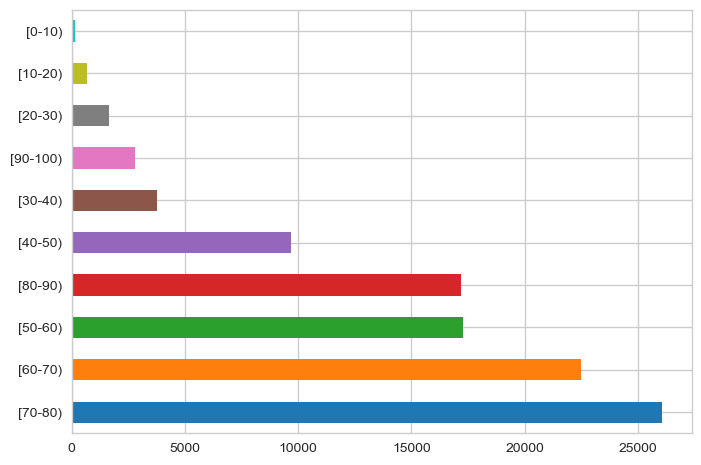

In [56]:
##distribution of diag_1_val is skewed
df_clean_readmitted_tf = df_clean["age"].value_counts()
df_clean_readmitted_tf.plot(kind = 'barh')
plt.show()

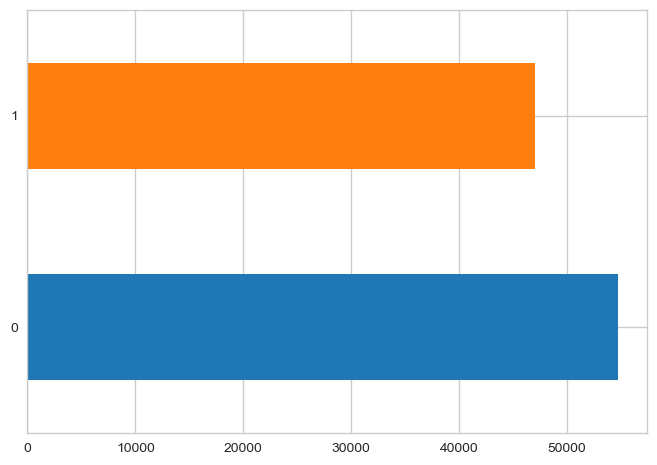

In [57]:
##distribution of gender is even
df_clean_readmitted_tf = df_clean["gender"].value_counts()
df_clean_readmitted_tf.plot(kind = 'barh')
plt.show()

## log transformation for skewed variables
num_medications looks skewed, we can log transform it to help it looks more normal.

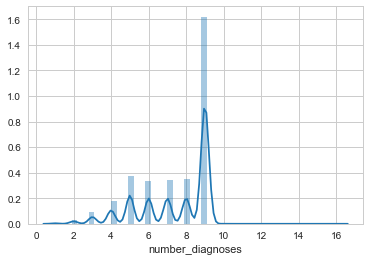

In [102]:
#number_diagnoses
sns.distplot(df_clean['number_diagnoses'])

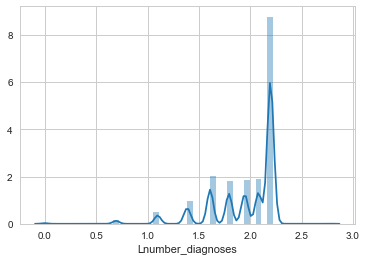

In [104]:
df_clean["number_diagnoses"][df_clean["number_diagnoses"]==0]=0.0001
df_clean['Lnumber_diagnoses']=np.nan
df_clean['Lnumber_diagnoses']=np.log(df_clean["number_diagnoses"])
sns.distplot(df_clean['Lnumber_diagnoses'])

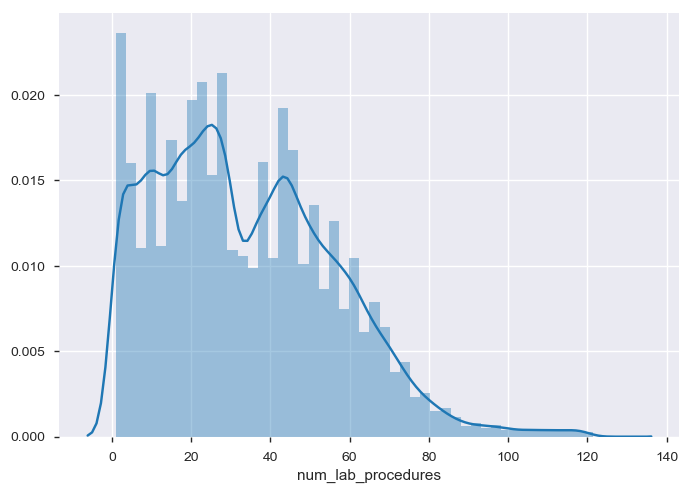

In [17]:
#density plot
sns.distplot(df_clean['num_lab_procedures'])
plt.show()

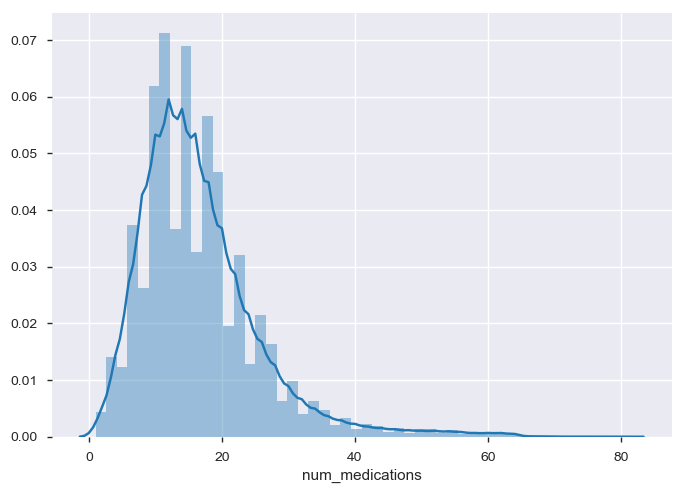

In [18]:
sns.distplot(df_clean['num_medications'])
plt.show()

In [88]:
#create a new varaible called Lnum_medications for log transformation
df_clean["num_medications"][df_clean["num_medications"]==0]=0.0001
df_clean['Lnum_medications']=np.nan
df_clean['Lnum_medications']=np.log(df_clean["num_medications"])


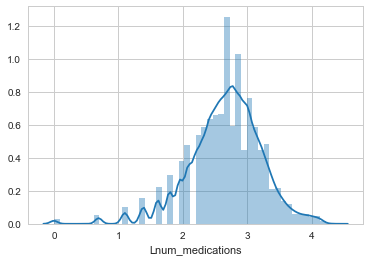

In [89]:
#check again after log transform, different skewness...well, i dont know
sns.distplot(df_clean['Lnum_medications'])
plt.show()

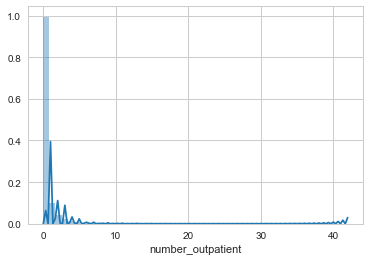

In [80]:
sns.distplot(df_clean['number_outpatient'])
plt.show()

In [91]:
df_clean["number_outpatient"][df_clean["number_outpatient"]==0]=0.0001
df_clean['Lnumber_outpatient']=np.nan
df_clean['Lnumber_outpatient']=np.log(df_clean["number_outpatient"])

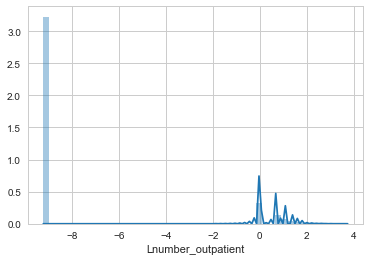

In [92]:
sns.distplot(df_clean['Lnumber_outpatient'])
plt.show()
#looks even worse..trial and error I guess

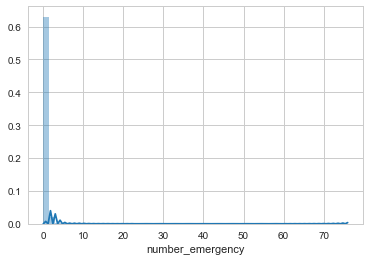

In [93]:
#number_emergency
sns.distplot(df_clean['number_emergency'])
plt.show()

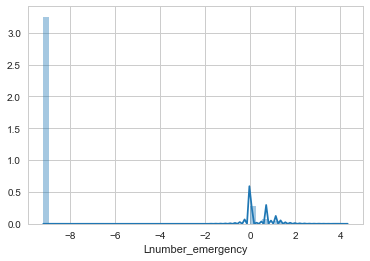

In [94]:
df_clean["number_emergency"][df_clean["number_emergency"]==0]=0.0001
df_clean['Lnumber_emergency']=np.nan
df_clean['Lnumber_emergency']=np.log(df_clean["number_emergency"])
sns.distplot(df_clean['Lnumber_emergency'])


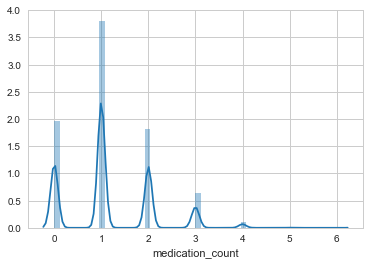

In [95]:
#'medication_count' new feature created in the data cleaning stage,
#it means the counts of the above 24 medications per     patient per encounter.

sns.distplot(df_clean['medication_count'])
plt.show()


In [97]:
#df_clean["medication_count"][df_clean["medication_count"]==0]=0.0001
#df_clean['Lmedication_count']=np.nan
#df_clean['Lmedication_count']=np.log(df_clean["medication_count"])
#sns.distplot(df_clean['Lmedication_count'])

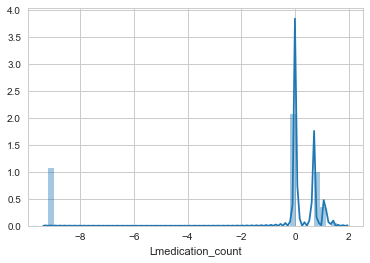

In [101]:
#medication_count

df_clean["medication_count"][df_clean["medication_count"]==0]=0.0001
df_clean['Lmedication_count']=np.nan
df_clean['Lmedication_count']=np.log(df_clean["medication_count"])


sns.distplot(df_clean['Lmedication_count'])
plt.show()

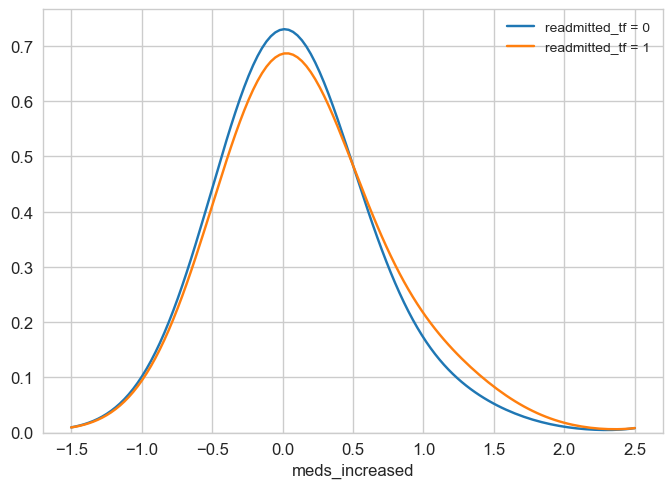

In [21]:
# meds_increased 

sns.kdeplot(t0['meds_increased'], bw = 0.5, label = 'readmitted_tf = 0')
sns.kdeplot(t1['meds_increased'], bw = 0.5, label = 'readmitted_tf = 1')
plt.xlabel('meds_increased', fontsize = 12)
locs, labels = plt.xticks()
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

In [54]:
#s = sns.lmplot(x = 'num_lab_procedures', y = 'number_diagnoses', data = df_clean, hue = 'readmitted_tf', fit_reg = True, scatter_kws = {'s' : 2})

#plt.show()

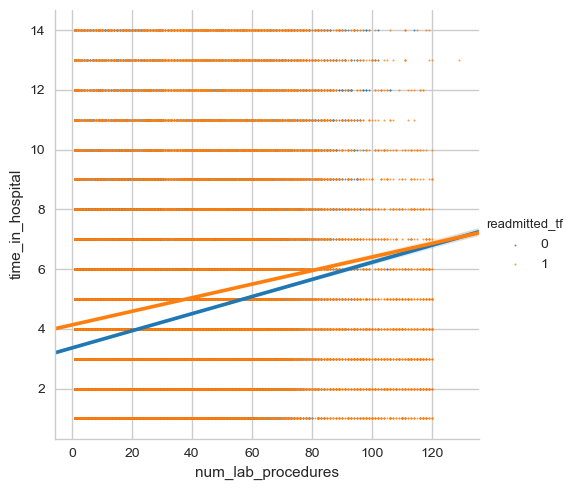

In [23]:
s = sns.lmplot(x = 'num_lab_procedures', y = 'time_in_hospital', data = df_clean, hue = 'readmitted_tf', fit_reg = True, scatter_kws = {'s' : 2})

plt.show()

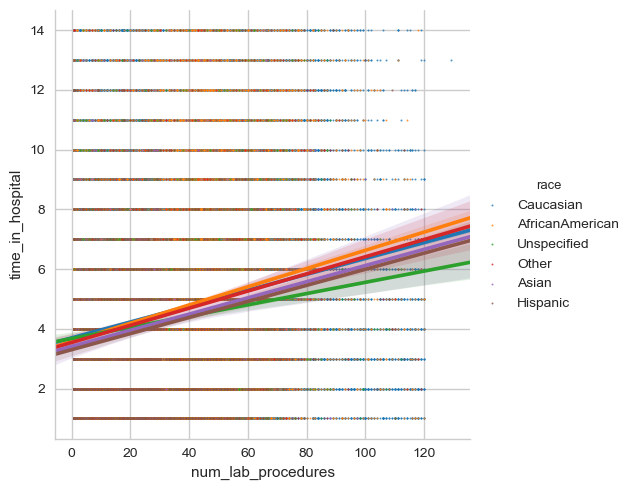

In [24]:
s = sns.lmplot(x = 'num_lab_procedures', y = 'time_in_hospital', data = df_clean, hue = 'race', fit_reg = True, scatter_kws = {'s' : 2})

plt.show()

In [55]:

#s = sns.lmplot(x = 'num_lab_procedures', y = 'num_medications', data = df_clean, hue = 'gender', fit_reg = True, scatter_kws = {'s' : 2})

#plt.show()

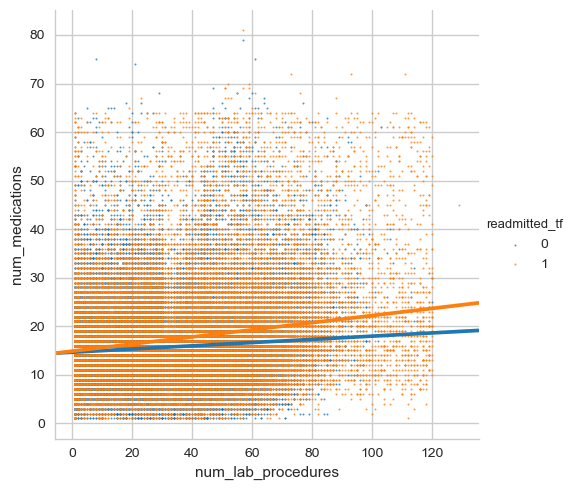

In [26]:
s = sns.lmplot(x = 'num_lab_procedures', y = 'num_medications', data = df_clean, hue = 'readmitted_tf', fit_reg = True, scatter_kws = {'s' : 2})

plt.show()

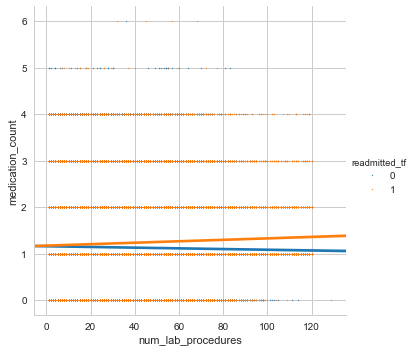

In [98]:
#joint plot 'num_lab_procedures','medication_count'
s = sns.lmplot(x = 'num_lab_procedures', y = 'medication_count', data = df_clean, hue = 'readmitted_tf', fit_reg = True, scatter_kws = {'s' : 2})

plt.show()

In [ ]:
#want to make age ordinal/ rank and include it
#also, even "gender","race",("diag_1" also) are not ordinal, we want to check if they have some kind of separation based on groups, 
#so we make these features int and plot the feature density plot to check
#genderNum, raceNum

#for genderNum
#df_clean['genderNum'] = df_clean['gender'].astype(int)

df_clean.gender[df_clean.gender == 'Male'] = 1
df_clean.gender[df_clean.gender == 'Female'] = 0

In [48]:
df_clean['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Unspecified', 'Other', 'Asian',
       'Hispanic'], dtype=object)

In [49]:
#label encoding just for viz-Feature Density Plot; for SVM, used one hot encoding
#raceNum
df_clean['age'].unique()


In [ ]:
df_clean.race[df_clean.race== 'Caucasian'] = 1
df_clean.race[df_clean.race== 'AfricanAmerican'] = 2
df_clean.race[df_clean.race== 'Asian'] = 3
df_clean.race[df_clean.race== 'Hispanic'] = 4
df_clean.race[df_clean.race== 'Unspecified'] = 5
df_clean.race[df_clean.race== 'Other'] = 6


In [58]:
#10 age groups
#feature density plot of age can help with answering the question like: does people older age tend to be readmitted?

df_clean.age[df_clean.age== '[0-10)'] = 1
df_clean.age[df_clean.age== '[10-20)'] = 2
df_clean.age[df_clean.age== '[20-30)'] = 3
df_clean.age[df_clean.age== '[30-40)'] = 4
df_clean.age[df_clean.age== '[40-50)'] = 5
df_clean.age[df_clean.age== '[50-60)'] = 6
df_clean.age[df_clean.age== '[60-70)'] = 7
df_clean.age[df_clean.age== '[70-80)'] = 8
df_clean.age[df_clean.age== '[80-90)'] = 9
df_clean.age[df_clean.age== '[90-100)'] = 10


In [71]:
#insulin
df_clean['insulin'].unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [72]:
#label encoding insulin
df_clean.insulin[df_clean.insulin== 'No'] = 1
df_clean.insulin[df_clean.insulin== 'Up'] = 2
df_clean.insulin[df_clean.insulin== 'Steady'] = 3
df_clean.insulin[df_clean.insulin== 'Down'] = 4

In [73]:
NumFeatures2=["num_lab_procedures","number_outpatient","number_emergency", "number_inpatient", "medication_count","gender","race","age","insulin"]
#create a df contian both numerical features and target
data_df=pd.concat((df_clean[NumFeatures2], df_clean_LR_y), axis=1)
#data_df=df_clean[NumFeatures2]
data_df.head()

,num_lab_procedures,number_outpatient,number_emergency,number_inpatient,medication_count,gender,race,age,insulin,readmitted_tf
0,41,0,0,0,0,0,1,1,1,0
1,59,0,0,0,1,0,1,2,2,1
2,11,2,0,1,1,0,2,3,1,0
3,44,0,0,0,1,1,1,4,2,0
4,51,0,0,0,2,1,1,5,3,0


In [74]:
data_df.shape

(101766, 10)

<Figure size 432x288 with 0 Axes>

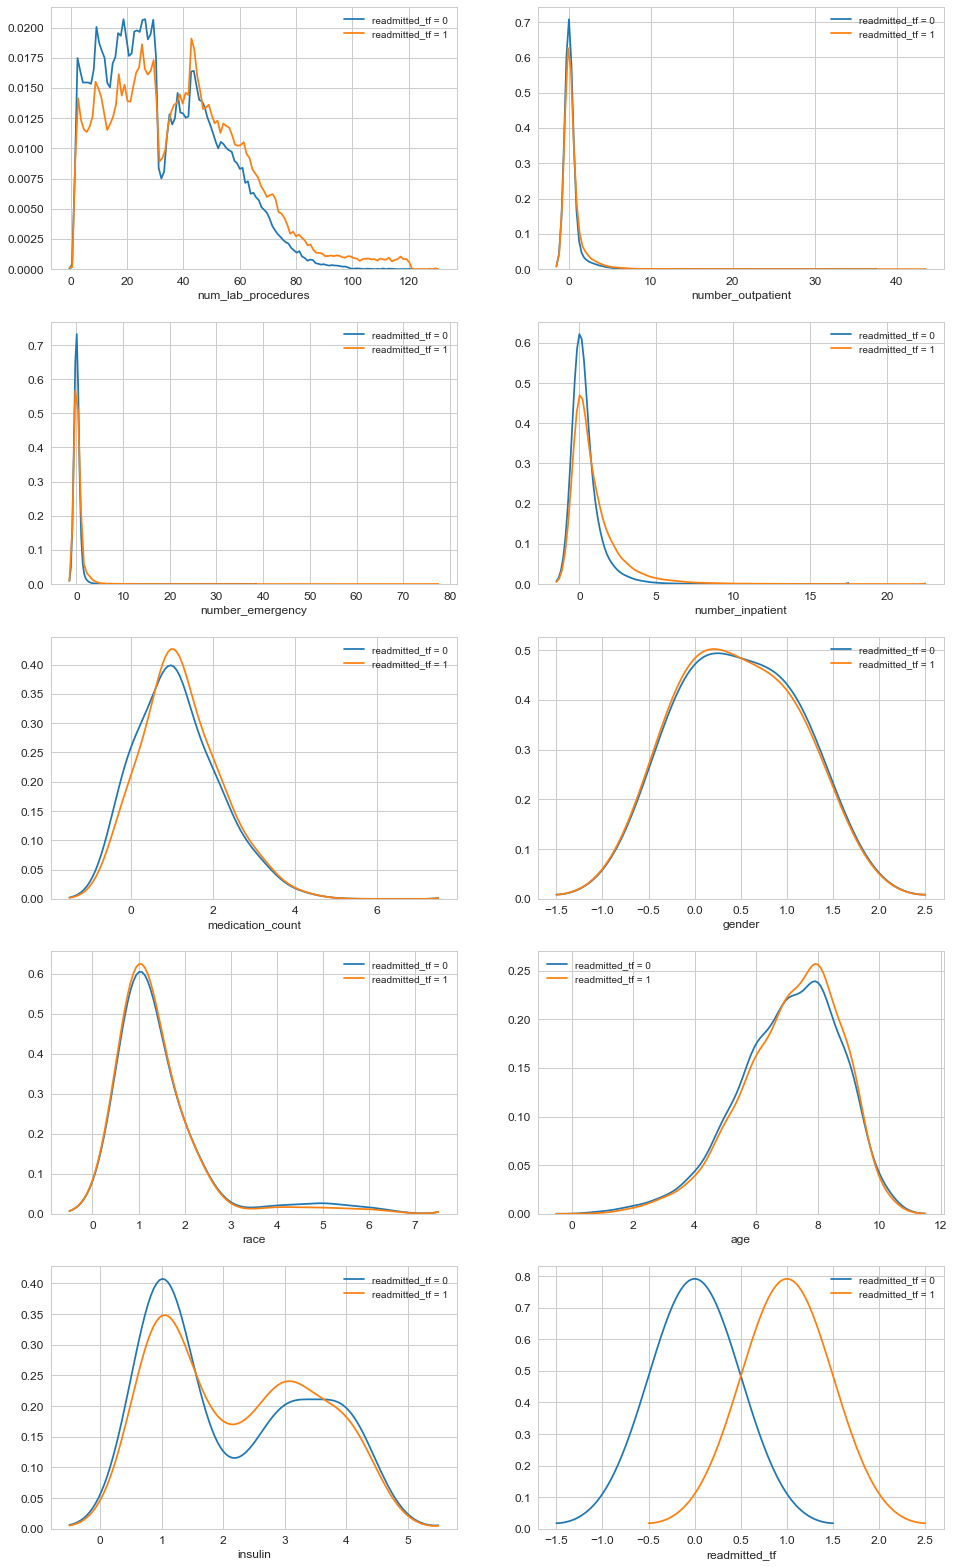

In [108]:
## Feature Density Plot
#can have a for loop to plot all features after cleaning, fore eg after gender tranform to 0 and 1

# Feature Density Plot
var = data_df.columns.values
i = 0
t0 = data_df.loc[data_df['readmitted_tf'] == 0]
t1 = data_df.loc[data_df['readmitted_tf'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5, 2, figsize = (16, 28))

for feature in var:
    i += 1
    plt.subplot(5, 2, i)
    sns.kdeplot(t0[feature], bw = 0.5, label = 'readmitted_tf = 0')
    sns.kdeplot(t1[feature], bw = 0.5, label = 'readmitted_tf = 1')
    plt.xlabel(feature, fontsize = 12)
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()